### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Define color palette

In [2]:
colors = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']

keys = ["red", "salmon","tan",'light_green','aqua_green','purple']
values = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']

color_dct = dict(zip(keys, values))

In [3]:
# import NOAA data
df = pd.read_csv('/Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/NOAA/2187743.csv', low_memory=False)

# keep only the temperature column
col_of_interest = ['DATE','HourlyDryBulbTemperature']
df = df[col_of_interest]
df.rename(columns={'HourlyDryBulbTemperature':'Temperature','DATE':'date'}, inplace=True)
    # Mostly NA's -> ,'BackupLatitude','BackupLongitude','TStorms','DailyAverageRelativeHumidity','DailyAverageWindSpeed','DailyDepartureFromNormalAverageTemperature','DailyMaximumDryBulbTemperature','DailyMinimumDryBulbTemperature','DailyPrecipitation','DailySnowfall','DailyWeather','Sunrise','Sunset'

# change the date into pandas datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S.%f')

# set index to pandas datetime
df.set_index('date', inplace=True)

# show sample of data
df.sample(2)

,Temperature
date,
2017-02-18 12:51:00,55
2017-11-26 07:51:00,45


In [4]:
# count the percentage of NA's
df_count = df.isna().sum().reset_index()
df_count[0] = 100*(df_count[0]/df.shape[0])
df_count.rename(columns={0:'Percent NA'})

,index,Percent NA
0,Temperature,3.378901


In [5]:
df.dropna(inplace=True)

### Ran into difficulty where some numbers have string flags

In [6]:
df['Temperature'].str.isnumeric().reset_index().head(2)

,date,Temperature
0,2013-01-01 00:51:00,True
1,2013-01-01 01:51:00,True


In [7]:
df[~df['Temperature'].str.isnumeric()].head(2)

,Temperature
date,
2015-12-26 04:51:00,54s
2016-02-14 07:51:00,-1


In [8]:
df = df[df['Temperature'].str.isnumeric()]
df['Temperature'] = df['Temperature'].astype(float)

In [11]:
df.to_csv('NOAA_Temp_NYC_Processed.csv', index=True)

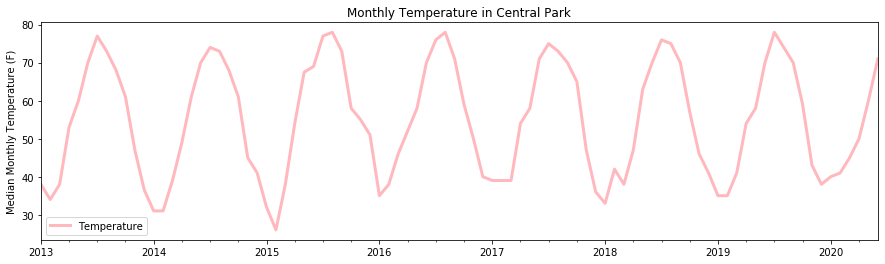

In [10]:
df[["Temperature"]].resample("1m").median().plot(figsize=(15,4), color=color_dct['red'], linewidth=3, alpha=0.7)
plt.xlabel('')
plt.ylabel('Median Monthly Temperature (F)')
plt.title('Monthly Temperature in Central Park')
plt.show()